## Machine Learning and Artificial Intelligence 
Summer High School Academic Program for Engineers (2025)
## Background: Vectors, Matrices, and NumPy

We will cover the basics of vectors, matrices, and associated operations -- as needed to understand Neural Networks.
We will also see how to represent vectors and matrices in numpy. 

* Numpy is a widely used package for numeric computing in Python.
* It provides an efficient data structure for numeric, n-dimensional arrays (ndarray)
* Supports vector and matrix operations.
* Numpy is implemented in C, so it is really fast and efficient.

Note: When implementing larger neural networks we will use PyTorch "tensor" objects instead, but much of the concepts and syntax will carry over from numpy ndarrays.

## Vectors

In math, you may have learned about a vector as a quantity that has a length (magnitude / norm) and a direction. Vectors are usually represented as arrays / ordered lists of numbers.

$\mathbf{v} = (1,2,3)$ or $\mathbf{v} = \left(\begin{array}{c}1\\2\\3\end{array}\right)$. 

1, 2, and 3 are called the *components (or elements)* of the vector. We write $v_i$ to refer to the $i$'th component of $\mathbf{v}$. We also say that the dimensionality of the vector $\mathbf{v}$ is 3. 

In machine learning, we usually use vectors to store data (called "feature/attribute vector") or weights/parameters (called "weight vector"). For now, we won't focus much on the idea of vectors having a direction, and we will only briefly cover the magnitude — though that interpretation will become important later.

### Some Important Vector Operations 

**Scalar multiplication**
A scalar is just a single number. Multiplying a vector with a scalar means multiplying each component of the vector with the scalar. 

$\left(\begin{array}{c}1\\2\\3\end{array}\right) * 3 = \left(\begin{array}{c}3\\6\\9\end{array}\right)$

Note that multiplying a vector will scale its length by the scalar. 

**Vector addition**
Adding two vectors means we add each pair of components. This is a *component wise* operation. 

$\left(\begin{array}{c}1\\2\\3\end{array}\right) + \left(\begin{array}{c}4\\5\\6\end{array}\right) = \left(\begin{array}{c}5\\7\\9\end{array}\right)$

Subtraction works the same way. 

**Dot product**
The dot product is an operation between two vectors of equal dimensions that results in a scalar. It's defined as the sum of component wise products. 

$(v_1,v_2,v_3) \cdot \left(\begin{array}{c}w_1\\w_2\\w_3\end{array}\right) = v_1 \cdot w_1 + v_2 \cdot w_2 + v_3 \cdot w_3$

or more generally

$\mathbf{v} \cdot \mathbf{w} = \mathbf{w} \cdot \mathbf{v} =  \sum\limits_{i=1}^d v_i \cdot w_i$, where $d$ is the dimensionality of the two vectors. 

For example 

$(1,2,3) \cdot \left(\begin{array}{c}4\\5\\6\end{array}\right) = 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6 =  32$

It is useful to think of the first vector as a "row vector" and the second vector as a "column vector" -- for vectors, this is really just a notational variant. Below, we will see that the dot product is a special case of the matrix product, where the first operand is a (1,d) matrix and the second vector is a (d,1) matrix. 

### Magnitude of a vector 
The magnitude (also known as the length, or $L_2$-Norm) of a vector is computed as follows:

$||\mathbf{v}||_2 = \sqrt{\sum\limits_{i=1}^d v[i]^2}$ = $\sqrt{\mathbf{v} \cdot \mathbf{v}}$


### Vectors in Python
How do we represent vectors in Python? 

First approach: Vectors could be lists.

How then would we multiply a vector with a scalar (a number)? 

In [60]:
[1, 2, 3] * 3 # multiplying a vector with a scalar? 

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [62]:
# You would have to do it component by component, like this: 
res = []
for i in [1,2,3]:
    res.append(i*3)
res

[3, 6, 9]

In [64]:
res = [i * 3 for i in [1,2,3]] # or using a list comprehension

In [66]:
res

[3, 6, 9]

How would you add two vectors?

In [69]:
[1, 2, 3] + [4, 5, 6] #  summing two vectors?

[1, 2, 3, 4, 5, 6]

In [71]:
# again, would have to do it component by component
a = [1,2,3]
b = [4,5,6]

res = []
for i in range(len(a)): # iterate over indices: 
    res.append(a[i] + b[i])    

In [73]:
res

[5, 7, 9]

In [75]:
[a[i] + b[i] for i in range(len(a))] # or using a list comprehension

[5, 7, 9]

How about the dot product?

In [78]:
[1, 2, 3] * [4, 5, 6] # dot product?

TypeError: can't multiply sequence by non-int of type 'list'

We could compute the dot product like this:

In [81]:
u = [1, 2, 3]
v = [4, 5, 6]

total = 0 
for i in range(len(u)):
    total += u[i] * v[i]
total

32

In [83]:
sum([u[i] * v[i] for i in range(len(u))]) # or like this

32

#### Vectors in NumPy
These solutions work, but they are ugly and slow. *Numpy* makes vector operations easy!

In [93]:
import numpy as np # common convention

u = np.array([1,2,3])
v = np.array([4,5,6])

np.dot(u,v)

32

In [95]:
u+v

array([5, 7, 9])

In [97]:
u * 2

array([2, 4, 6])

Note: Applying a function to a numpy array will apply it component-wise. So

In [110]:
u * v # component-wise multiplication, NOT the dot product.

array([ 4, 10, 18])

In [108]:
import math 

# don't worry about what this function does for now.
def sigmoid(z):  
    return 1 / (1+math.e**-z)

sigmoid(u)

array([0.73105858, 0.88079708, 0.95257413])

In [36]:
type(v)

numpy.ndarray

In [38]:
u

array([1, 2, 3])

In [112]:
u.shape   #Note: This is a one-element tuple, indicating that this is a 1D array, i.e. a vector

(3,)

The basic data type in numpy is the numpy **n-dimensional array**. These can be used to represent vectors (1D) matrices (2D) or tensors (nD).

Arrays are commonly used to represent datasets:
* 1 dimensions numpy arrays are also often used to represent a series of data (for example, the "label" column)
* 2-dimensional arrays often represent complete data sets (in tabular format, each row is a specimen, each column is an attribute).

Later we will also discover use-cases for 3D tensors.

Numpy arrays are very similar to Python lists. Indexing and slicing works the same way (including assingments). Unlike a Python list, all cells in the same array must contain the same data type. 

Operators don't work the same for lists and arrays and there are many additional methods defined on them.

In [114]:
len(u)

3

In [116]:
u.shape

(3,)

In [118]:
def magnitude(u): # how would you compute the magnitude of vector u?
    pass 

**Indexing and slicing** works similar to Python lists:

In [122]:
u

array([1, 2, 3])

In [124]:
u[0]

1

In [126]:
u[1]

2

In [130]:
u[1:3]

array([2, 3])

In [132]:
u[0] = 4

In [134]:
u

array([4, 2, 3])

## Matrices

Matrices are grids or tables of numbers (with rows and columns). In math (linear algebra), they are often interpreted as as systems of linear equations, but this is not relevant for us. 

In machine learning with neural networks, we use matrices in three different ways: 

1. to represent data
2. to represent intermediate representations (activations)
3. to represent weights ("weight matrix") -- below, we will see how you can think of a weight matrix as a function that maps one vector to another (a linear transformation).

$\mathbf{W} = \begin{bmatrix} 1 & 2 & -1 \\ -2 &0 &3\\ \end{bmatrix}$

The shape of a matrix is the number of rows and columns. The matrix $\mathbf{W}$ above is a $2 \times 3$ matrix.
We refer to individual elements of the matrix using row and column indices $W_{i,j}$, for example $W_{1,2} = -2$

**multi-dimensional arrays in numpy**

In [61]:
import numpy as np

Vectors can be thought of as matrices, either row vectors (a single row) or column vectors (a single column).

In [63]:
u = np.array([1,2,3])

In [164]:
u[2] # Note: in mathematical notation we usually use indices starting at 1, in code we use indices starting at 0.

3

In [67]:
u.shape # u is a vector, i.e. a 1D array of length 3 

(3,)

In [69]:
u

array([1, 2, 3])

In [166]:
test = np.array([[1,2,3]]) # test is a 2D array = a matrix of size (1,3)

In [105]:
test

array([[1, 2, 3]])

In [107]:
test.shape

(1, 3)

In [168]:
test = np.array([[1],[2],[3]])
test

array([[1],
       [2],
       [3]])

In [170]:
test.shape

(3, 1)

**Indices and slicing on matrices**
Often we want to access a specific row or column from a 2D array.  This can be achieved using *slicing*. Indexing and slicing works similar to list slicing, but in multiple dimensions. 

In [179]:
test2 = np.array([[1,4,8],[2,5,9],[3,6,7],[8,9,0]])

In [181]:
test2

array([[1, 4, 8],
       [2, 5, 9],
       [3, 6, 7],
       [8, 9, 0]])

In [183]:
test2.shape

(4, 3)

In [185]:
test2[2,1] # NOT test2[2][1]

6

In [189]:
test2[2,:] # all columns, row 1

array([3, 6, 7])

In [99]:
test2[:,1] # all rows, column 1

array([4, 5, 6, 9])

In [193]:
test2[1:3, 1] # row 1 and 2, and column 1

array([5, 6])

We can also assign to a matrix (overwriting entries): 

In [207]:
test2

array([[1, 4, 8],
       [2, 5, 9],
       [3, 6, 7],
       [8, 9, 0]])

In [209]:
test2[0,1] = -1
test2

array([[ 1, -1,  8],
       [ 2,  5,  9],
       [ 3,  6,  7],
       [ 8,  9,  0]])

In [213]:
test2[:, 1] = np.array([0,0,0,0]) # overwriting a complete column!
test2

array([[1, 0, 8],
       [2, 0, 9],
       [3, 0, 7],
       [8, 0, 0]])

**Creating matrices**

In [198]:
a = np.zeros((3,4)) # 3x4 array filled with zeros

In [200]:
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [202]:
a = np.zeros((3,4),dtype=int) # 3x4 array filled with zeros

In [204]:
a

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [151]:
a.dtype

dtype('int64')

In [153]:
a

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [155]:
a = np.array(range(25)) # create vector and reshape.

In [157]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [163]:
a=np.array(range(25)) # create 1D vector, then reshape
square = a.reshape(5,5)
square

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [173]:
square.reshape((25,1))

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24]])

In [197]:
square

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [203]:
a

array([[256,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]], dtype=uint64)

a.reshape(4,-1)  # -1 means "infer the missing dimension based on
                      # the total number of items 

### Back to Matrices

**Transpose**: 

The matrix transpose turns all rows into columns and all columns into row. For example, if 

$\mathbf{W} = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}$ then 

$\mathbf{W^\intercal} = \begin{bmatrix} 1 &4 \\ 2 &5 \\ 3 & 6 \end{bmatrix}$



In numpy, we can simply call the `.transpose()` method or use the `.T` attribute to get a transpose. 

In [256]:
W = np.array([[1,2,3],[4,5,6]])
W.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [258]:
W.T

array([[1, 4],
       [2, 5],
       [3, 6]])



**Multiplying a matrix with a vector:** 

You can think of a matrix as a function that maps one vector to another vector. 
This is a *linear transformation* of the vector that scales (stretches), rotates, reflects, or projects the vector (under the geometric interpretation).

In machine learning, we use this to apply a weight matrix to an input vector and obtain a projection (intermediate representation) of the input. You can also think of this as applying the weights for multiple units/neurons at the same time, as we will see later.

$
\mathbf{W} = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}, \quad
\mathbf{v} = \begin{bmatrix}
1 \\
0 \\
-1
\end{bmatrix}
$


$
\mathbf{W} \mathbf{v} = 
\begin{bmatrix}
1 \cdot 1 + 2 \cdot 0 + 3 \cdot (-1) \\
4 \cdot 1 + 5 \cdot 0 + 6 \cdot (-1)
\end{bmatrix}
=
\begin{bmatrix}
1 + 0 - 3 \\
4 + 0 - 6
\end{bmatrix}
=
\begin{bmatrix}
-2 \\
-2
\end{bmatrix}
$

We say that we "apply" the matrix $\mathbf{W}$ to the vector $\mathbf{v}$. 
Note that the vector is represented as a column vector with 3 components (i.e. a $3 \times 1$ matrix) and the result is a column vector with 2 components (i.e. a $2 \times 1$ matrix). 

On the level of shapes, this is $(2,3) \times (3,1) = (2,1)$. The "inner dimensions" must match (here: 3), and the resulting matrix has the shape of the "outer dimensions" (here: $2 \times 1$).

**Multiplying two matrices:**
We can generalize this concept to multiplying two matrices. **This is the core operation performed by neural networks.** Matrix multiplication can be parallelized on GPUs, which is why they are so important when training and deploying neural network models.

$
\mathbf{W} = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}, \quad
\mathbf{V} = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
-1 & 2
\end{bmatrix}
$


$
\mathbf{WV} =
\begin{bmatrix}
1 \cdot 1 + 2 \cdot 0 + 3 \cdot (-1) & 1 \cdot 0 + 2 \cdot 1 + 3 \cdot 2 \\
4 \cdot 1 + 5 \cdot 0 + 6 \cdot (-1) & 4 \cdot 0 + 5 \cdot 1 + 6 \cdot 2
\end{bmatrix}
=
\begin{bmatrix}
1 + 0 - 3 & 0 + 2 + 6 \\
4 + 0 - 6 & 0 + 5 + 12
\end{bmatrix}
=
\begin{bmatrix}
-2 & 8 \\
-2 & 17
\end{bmatrix}
$

Note: to compute index $i,j$ in the result $\mathbf{WV}$, you compute the dot product between row $i$ from $\mathbf{W}$ and column $j$ in 
$\mathbf{V}$.

In terms of shapes we get: $(2,3) \times (3,2) = (2,2)$. Again, note how the inner dimensions need to match. Multiplying a matrix and a vector is a special case of matrix multiplication. 

In numpy, we can use the matmul operation to multiply two matrices. 

In [275]:
W = np.array([[1,2,3],[4,5,6]])
V = np.array([[1,0],[0,1],[-1,2]])

W

array([[1, 2, 3],
       [4, 5, 6]])

In [277]:
V

array([[ 1,  0],
       [ 0,  1],
       [-1,  2]])

In [279]:
np.matmul(W,V)

array([[-2,  8],
       [-2, 17]])

Using the * operator does _not_ work. Instead, this would result in element-wise multiplication, but because the dimensions of the matrices do not match, the operation will fail. 

W * V

In [287]:
np.matmul(V,W) # This works, because inner dimensions match (3,2) x (2,3) = (3,3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

How about a single vector? 

In [290]:
v = np.array([1,0,-1])
np.matmul(W,v)

array([-2, -2])

Numpy automatically converts the vector into a row vector of the proper size (3,1) 

## Bonus: Representing Images with Numpy

We can also use numpy to represent images and display them with matplotlib. 
Images are represented as 3D tensors. E.g. a (128, 128,3) tensor represents a 128x128 pixel image with 3 color channels. 

In [299]:
a = np.array(list(range(24)))
a.reshape(2,4,3)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [62]:
a = np.zeros((9,9,3), dtype="float") # three dimensional array

In [64]:
a

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],



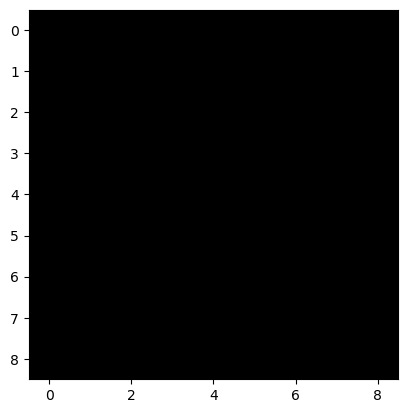

In [58]:
plt.imshow(a)

In [60]:
a[2,2,:]

array([0., 0., 0.])

In [48]:
a[2,2,:] = np.array([0.9,0.0,0.0]) #RGB value, red pixel at 2,2 
#a[2,6,:] = np.array([1,0,0])
#a[6,4,:] = np.array([0.8,0.0,0.5]) # purple pixel at 6,4
#a[6,3,:] = np.array([0.8,0.0,0.5])
#a[6,5,:] = np.array([0.8,0.0,0.5])
#a[5,6,:] = np.array([0.8,0.0,0.5])
#a[5,2,:] = np.array([0.8,0.0,0.5])

In [50]:
a

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
  

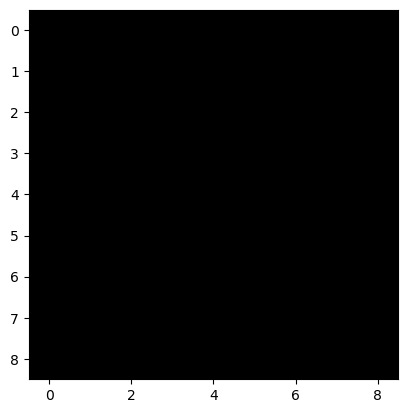

In [52]:
plt.imshow(a)

In [40]:
image = plt.imread("python.png")

In [42]:
image.shape

(61, 50, 4)

In [44]:
image.dtype

dtype('float32')

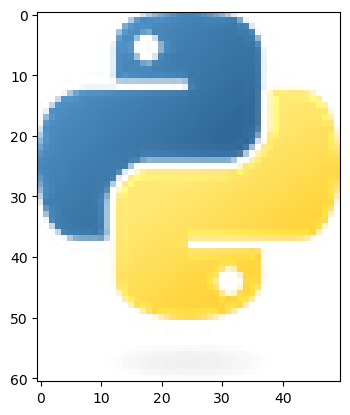

In [375]:
plt.imshow(image)

In [46]:
image.shape

(61, 50, 4)

In [377]:
image[:,:,2] = np.zeros((61,50))

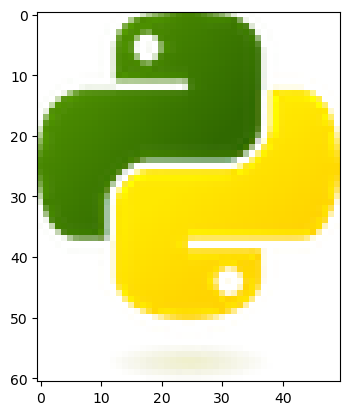

In [379]:
plt.imshow(image)

In [381]:
image[:,:,1] = np.zeros((61,50))

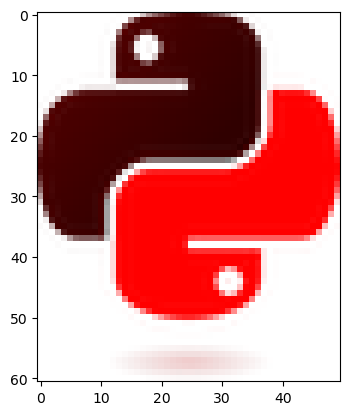

In [383]:
plt.imshow(image)

In [389]:
image[:,:,3] = np.ones((61,50))

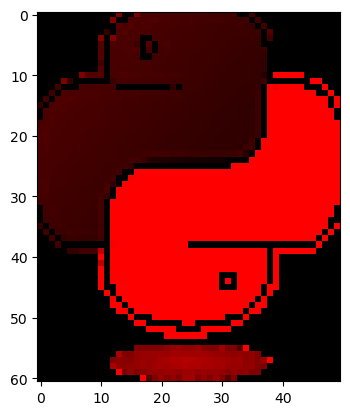

In [391]:
plt.imshow(image)

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

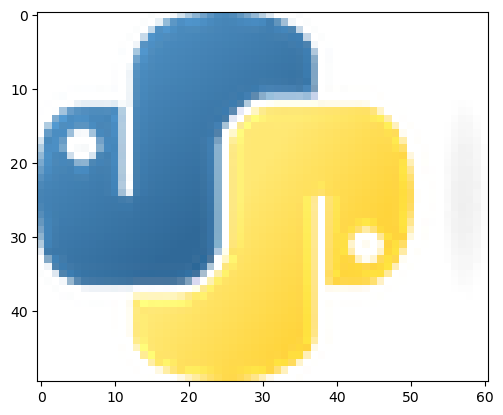

In [395]:
transposed = np.transpose(image, (1,0,2))
plt.imshow(transposed)